In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Analyse Exploratoire**

In [ ]:
df = pd.read_csv("train.csv")

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [ ]:
df.shape

(550068, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


# *Visualisation des variables*

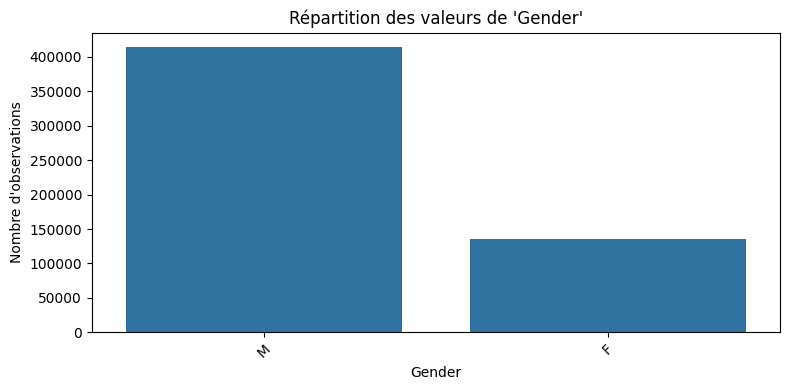

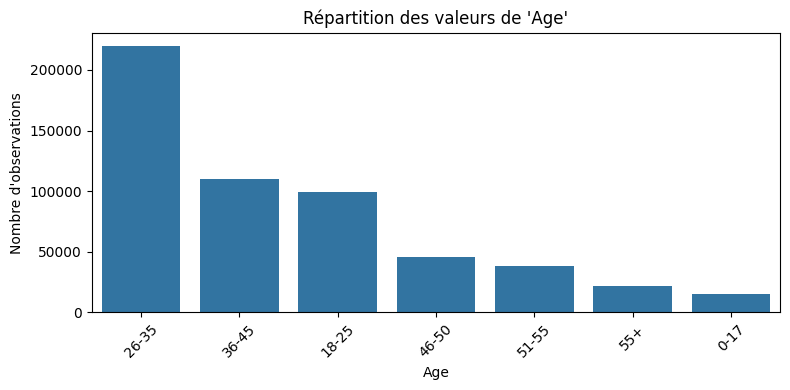

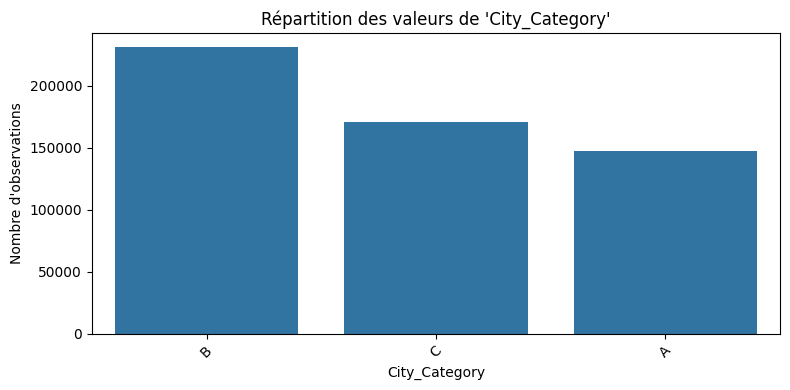

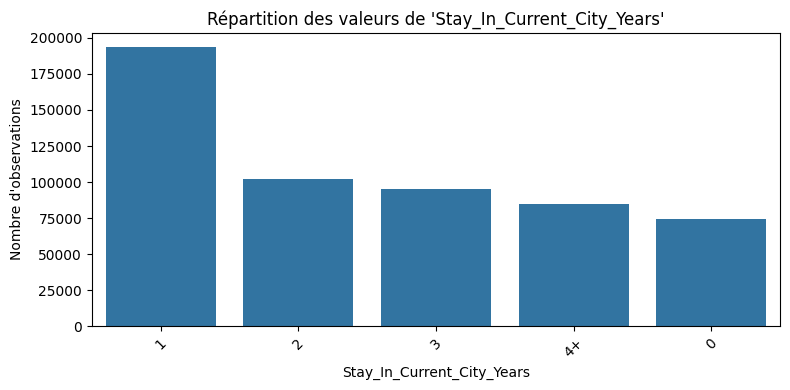

In [ ]:
# Identifier les colonnes catégorielles dans le DataFrame
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclure celles avec trop de modalités (ex: IDs comme Product_ID ou User_ID)
cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 20]

# Boucle pour afficher les countplots
for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Répartition des valeurs de '{col}'")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

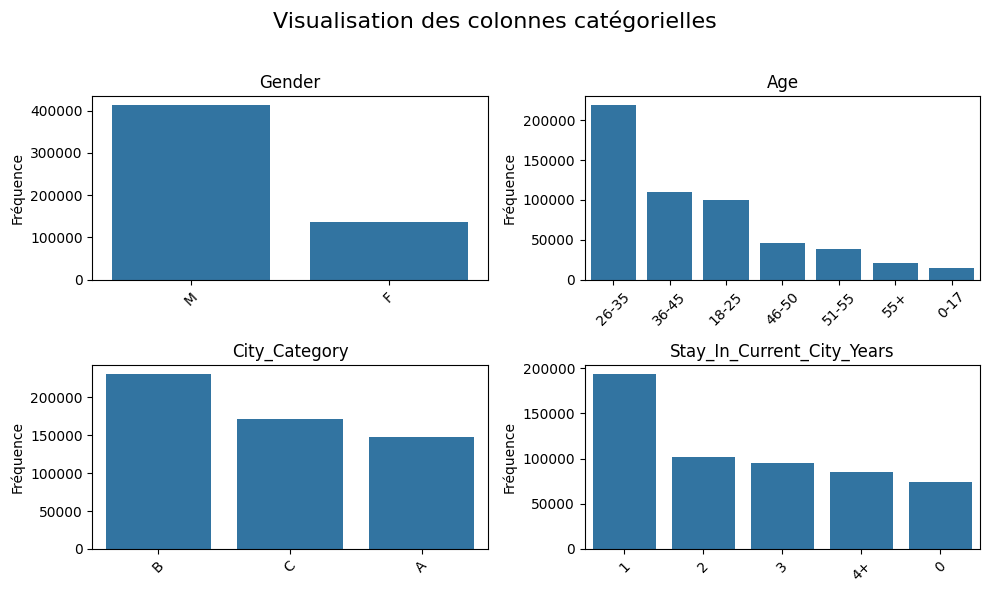

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Colonnes catégorielles avec peu de modalités
categorical_cols_small = [col for col in categorical_cols if df[col].nunique() <= 20]

# Paramètres d'affichage
n_cols = 2  # 2 colonnes
n_rows = 2  # 2 lignes => 4 graphiques par figure
plots_per_fig = n_cols * n_rows

# Affichage par groupes de 4
for i in range(0, len(categorical_cols_small), plots_per_fig):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 6))  # figure carrée bien lisible
    fig.suptitle("Visualisation des colonnes catégorielles", fontsize=16)

    for j, col in enumerate(categorical_cols_small[i:i+plots_per_fig]):
        row = j // n_cols
        col_idx = j % n_cols
        ax = axs[row, col_idx]
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel("Fréquence")
        ax.tick_params(axis='x', rotation=45)

    # Supprimer les axes vides si on est à la fin
    for k in range(j + 1, plots_per_fig):
        row = k // n_cols
        col_idx = k % n_cols
        fig.delaxes(axs[row, col_idx])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de la place pour le titre
    plt.show()

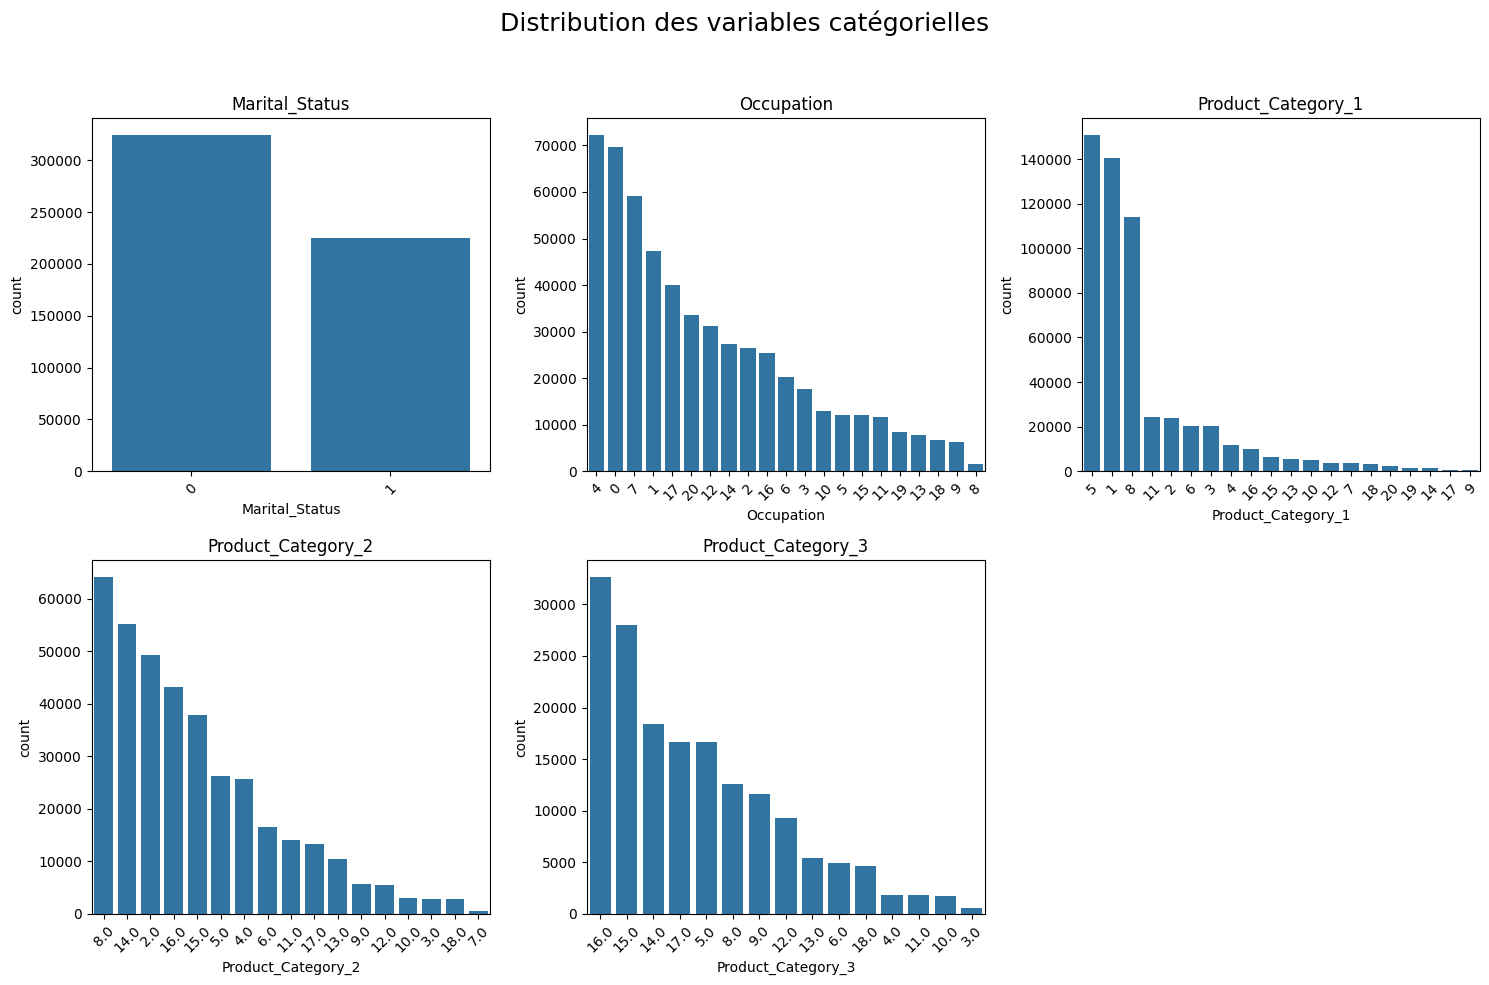

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Marital_Status', 'Occupation', 'Product_Category_1',
        'Product_Category_2', 'Product_Category_3']

n_cols = 3
n_rows = 2
plots_per_fig = n_cols * n_rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))
fig.suptitle("Distribution des variables catégorielles", fontsize=18)

for i, col in enumerate(cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axs[row, col_idx]
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# Supprimer les cases vides s'il y en a
for k in range(i + 1, plots_per_fig):
    row = k // n_cols
    col_idx = k % n_cols
    fig.delaxes(axs[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# *Boxplots des variables numériques pour détections des outliers*

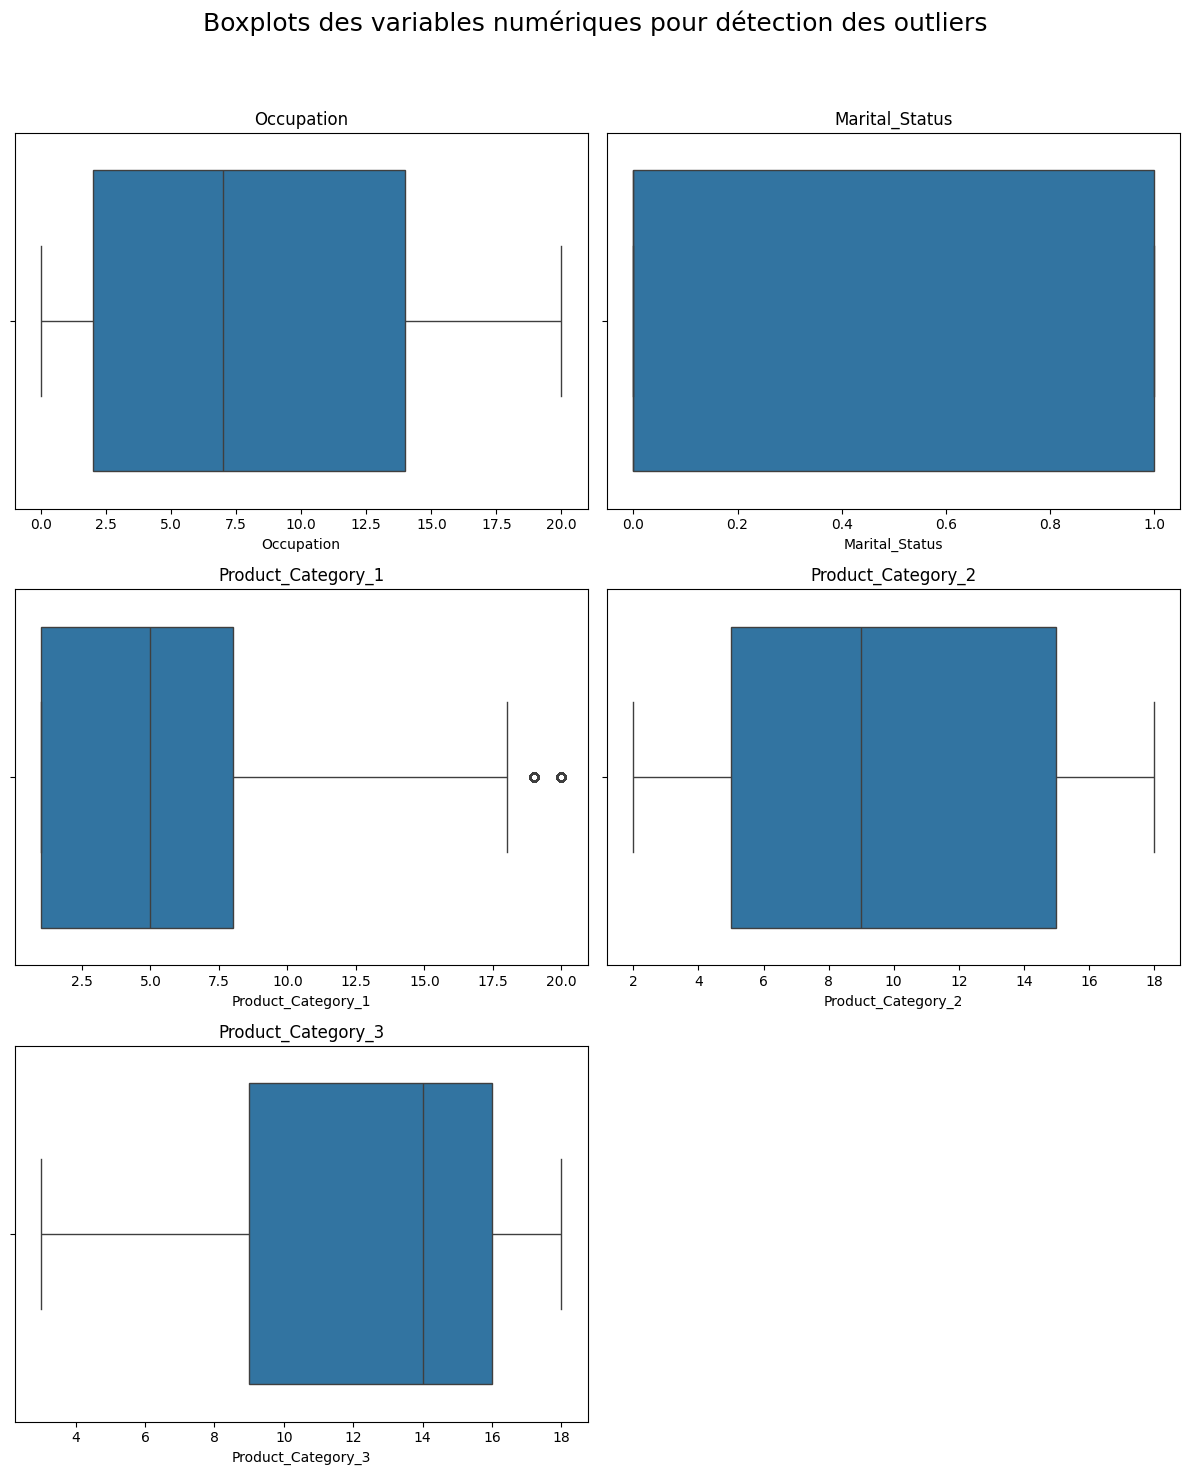

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques utiles
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                if col not in ['User_ID', 'Product_ID', 'Purchase']]

# Paramètres de grille
plots_per_fig = len(numeric_cols)
n_cols = 2
n_rows = (plots_per_fig + 1) // n_cols

# Création de la figure
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
fig.suptitle("Boxplots des variables numériques pour détection des outliers", fontsize=18)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axs[row, col_idx]
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(col)

# Supprimer les axes vides
for k in range(i + 1, n_rows * n_cols):
    row = k // n_cols
    col_idx = k % n_cols
    fig.delaxes(axs[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Sauvegarde dans un fichier image
plt.savefig("boxplots_numeriques.png", dpi=300)
plt.show()

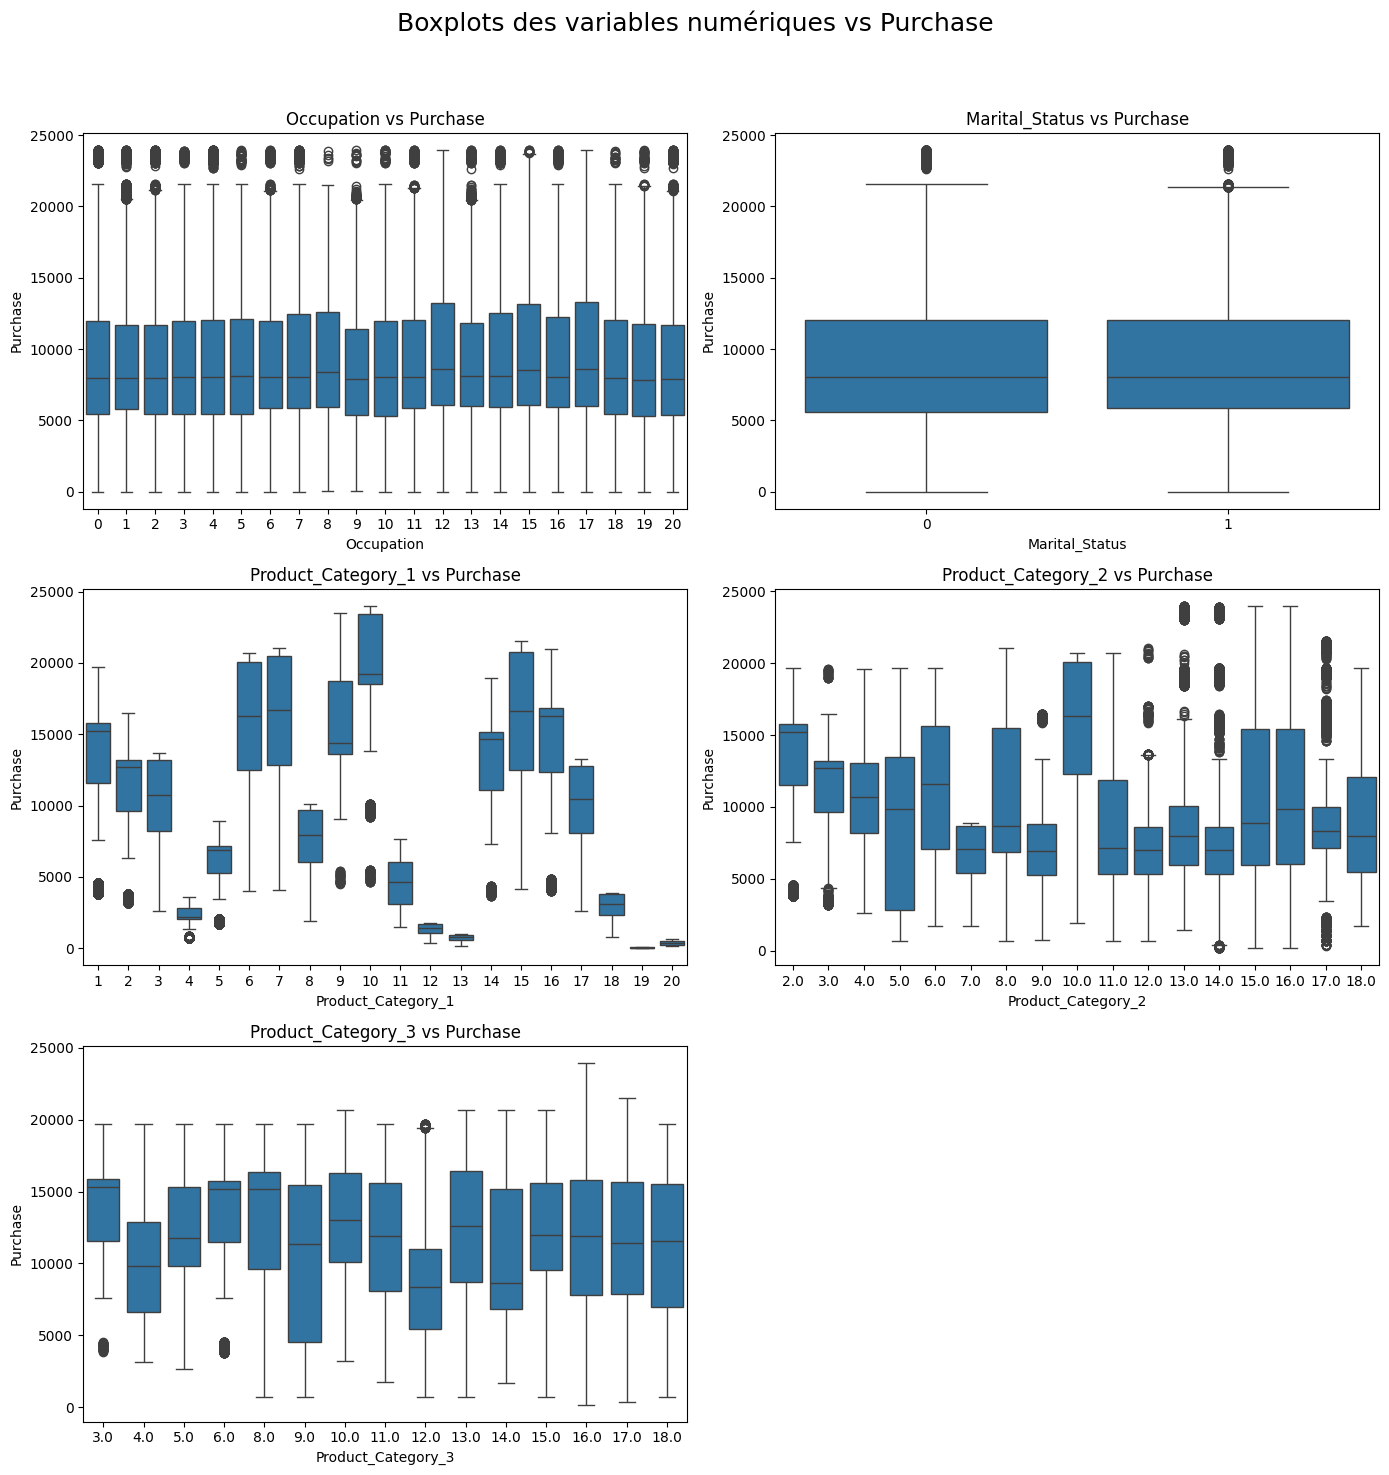

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colonnes numériques (hors identifiants et la cible elle-même)
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                if col not in ['User_ID', 'Product_ID', 'Purchase']]

# Paramètres pour la grille
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
fig.suptitle("Boxplots des variables numériques vs Purchase", fontsize=18)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axs[row, col_idx]

    # Catégorisation temporaire de Purchase pour visualiser l’effet de la variable numérique sur le montant dépensé
    sns.boxplot(data=df, x=col, y='Purchase', ax=ax)
    ax.set_title(f"{col} vs Purchase")

# Supprimer les sous-graphiques vides s’il y en a
for k in range(i + 1, n_rows * n_cols):
    row = k // n_cols
    col_idx = k % n_cols
    fig.delaxes(axs[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("boxplots_numeriques_vs_purchase.png", dpi=300)
plt.show()

# *Matrice de correlation*

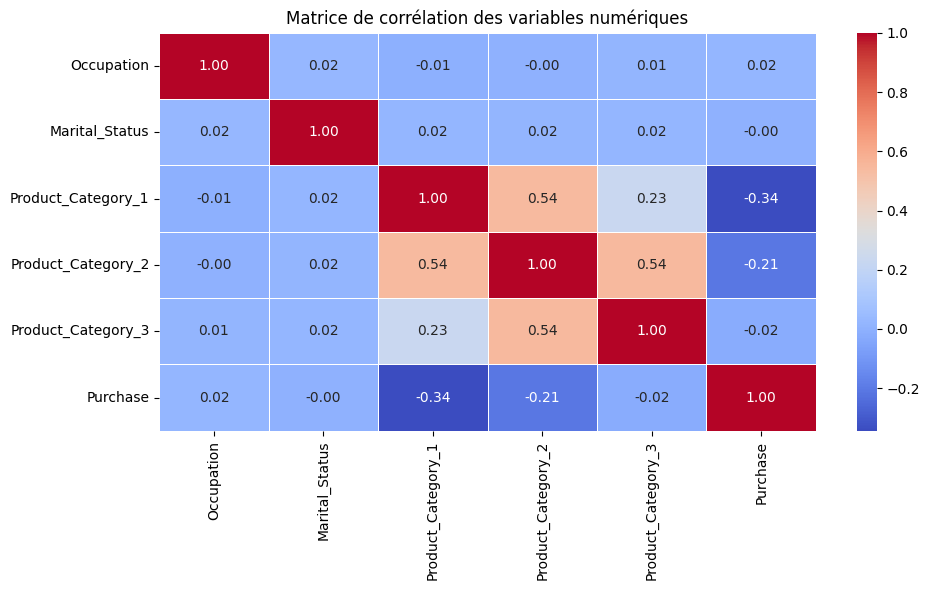

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes numériques sans identifiants
corr_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
             if col not in ['User_ID', 'Product_ID']]

# Matrice de corrélation
corr_matrix = df[corr_cols].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.tight_layout()
plt.savefig("heatmap_correlation.png", dpi=300)
plt.show()

# *Traitement des valeurs manquantes*

In [ ]:
# Remplir les valeurs manquantes avec une catégorie spéciale
df['Product_Category_2'].fillna(-1, inplace=True)
df['Product_Category_3'].fillna(-1, inplace=True)

# Transformer en int pour catégorisation
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

<ipython-input-25-933ac6f70349>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(-1, inplace=True)
<ipython-input-25-933ac6f70349>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

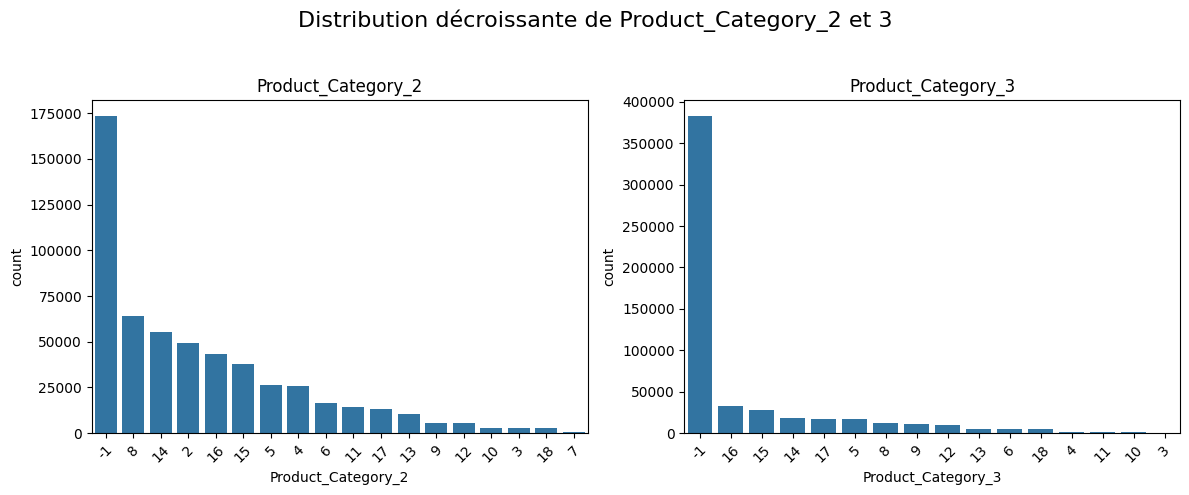

In [ ]:
# Liste des colonnes à visualiser
cols = ['Product_Category_2', 'Product_Category_3']
n_cols = 2
n_rows = 1
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 5))
fig.suptitle("Distribution décroissante de Product_Category_2 et 3", fontsize=16)

for i, col in enumerate(cols):
    # Trier les catégories par fréquence décroissante
    order = df[col].value_counts().sort_values(ascending=False).index
    sns.countplot(data=df, x=col, ax=axs[i], order=order)
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# *Feature Engeenering*

In [ ]:
# remplacement des classes de la colonne age par leurs centres respectifs
age_mapping_mean = {
    '0-17': 16,
    '18-25': 21.5,
    '26-35': 30.5,
    '36-45': 40.5,
    '46-50': 48,
    '51-55': 53,
    '55+': 60
}

df['Age'] = df['Age'].map(age_mapping_mean)

In [ ]:
# One-hot encoding sans supprimer la colonne de base
Stay_In_Current_City_Years_dummies = pd.get_dummies(df['Stay_In_Current_City_Years'], prefix ='Stay', drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, Stay_In_Current_City_Years_dummies], axis=1)

In [ ]:
# One-hot encoding sans supprimer la colonne de base
Marital_Status_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital', drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, Marital_Status_dummies], axis=1)

In [ ]:
# One-hot encoding sans supprimer la colonne de base
Gender_dummies = pd.get_dummies(df['Gender'], drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, Gender_dummies], axis=1)

In [ ]:
# One-hot encoding sans supprimer la colonne de base
city_dummies = pd.get_dummies(df['City_Category'], prefix='City', drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, city_dummies], axis=1)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Stay_1',
       'Stay_2', 'Stay_3', 'Stay_4+', 'Marital_1', 'M', 'City_B', 'City_C'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])

In [ ]:
# One-hot encoding sans supprimer la colonne de base
Occupation_dummies = pd.get_dummies(df['Occupation'], prefix='Occ', drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, Occupation_dummies], axis=1)

In [ ]:
# One-hot encoding sans supprimer la colonne de base
ProductCategory1_dummies = pd.get_dummies(df['Product_Category_1'], prefix='Pc1', drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, ProductCategory1_dummies], axis=1)

In [ ]:
# One-hot encoding sans supprimer la colonne de base
ProductCategory2_dummies = pd.get_dummies(df['Product_Category_2'], prefix='Pc2', drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, ProductCategory2_dummies], axis=1)

In [ ]:
# One-hot encoding sans supprimer la colonne de base
ProductCategory3_dummies = pd.get_dummies(df['Product_Category_3'], prefix='Pc3', drop_first=True, dtype=int)

# Ajout au DataFrame
df = pd.concat([df, ProductCategory3_dummies], axis=1)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Stay_1',
       'Stay_2', 'Stay_3', 'Stay_4+', 'Marital_1', 'M', 'City_B', 'City_C',
       'Occ_1', 'Occ_2', 'Occ_3', 'Occ_4', 'Occ_5', 'Occ_6', 'Occ_7', 'Occ_8',
       'Occ_9', 'Occ_10', 'Occ_11', 'Occ_12', 'Occ_13', 'Occ_14', 'Occ_15',
       'Occ_16', 'Occ_17', 'Occ_18', 'Occ_19', 'Occ_20', 'Pc1_2', 'Pc1_3',
       'Pc1_4', 'Pc1_5', 'Pc1_6', 'Pc1_7', 'Pc1_8', 'Pc1_9', 'Pc1_10',
       'Pc1_11', 'Pc1_12', 'Pc1_13', 'Pc1_14', 'Pc1_15', 'Pc1_16', 'Pc1_17',
       'Pc1_18', 'Pc1_19', 'Pc1_20', 'Pc2_2', 'Pc2_3', 'Pc2_4', 'Pc2_5',
       'Pc2_6', 'Pc2_7', 'Pc2_8', 'Pc2_9', 'Pc2_10', 'Pc2_11', 'Pc2_12',
       'Pc2_13', 'Pc2_14', 'Pc2_15', 'Pc2_16', 'Pc2_17', 'Pc2_18', 'Pc3_3',
       'Pc3_4', 'Pc3_5', 'Pc3_6', 'Pc3_8', 'Pc3_9', 'Pc3_10', 'Pc3_11',
       'Pc3_12', 'Pc3_

In [ ]:
# Suppression des colonnes d’origine après transformation ou encodage
cols_to_drop = [
    'User_ID', 'Product_ID',
    'City_Category',
    'Gender',
    'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
    'Stay_In_Current_City_Years',
    'Occupation',
    'Marital_Status'

]

df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df.columns

Index(['Age', 'Purchase', 'Stay_1', 'Stay_2', 'Stay_3', 'Stay_4+', 'Marital_1',
       'M', 'City_B', 'City_C', 'Occ_1', 'Occ_2', 'Occ_3', 'Occ_4', 'Occ_5',
       'Occ_6', 'Occ_7', 'Occ_8', 'Occ_9', 'Occ_10', 'Occ_11', 'Occ_12',
       'Occ_13', 'Occ_14', 'Occ_15', 'Occ_16', 'Occ_17', 'Occ_18', 'Occ_19',
       'Occ_20', 'Pc1_2', 'Pc1_3', 'Pc1_4', 'Pc1_5', 'Pc1_6', 'Pc1_7', 'Pc1_8',
       'Pc1_9', 'Pc1_10', 'Pc1_11', 'Pc1_12', 'Pc1_13', 'Pc1_14', 'Pc1_15',
       'Pc1_16', 'Pc1_17', 'Pc1_18', 'Pc1_19', 'Pc1_20', 'Pc2_2', 'Pc2_3',
       'Pc2_4', 'Pc2_5', 'Pc2_6', 'Pc2_7', 'Pc2_8', 'Pc2_9', 'Pc2_10',
       'Pc2_11', 'Pc2_12', 'Pc2_13', 'Pc2_14', 'Pc2_15', 'Pc2_16', 'Pc2_17',
       'Pc2_18', 'Pc3_3', 'Pc3_4', 'Pc3_5', 'Pc3_6', 'Pc3_8', 'Pc3_9',
       'Pc3_10', 'Pc3_11', 'Pc3_12', 'Pc3_13', 'Pc3_14', 'Pc3_15', 'Pc3_16',
       'Pc3_17', 'Pc3_18'],
      dtype='object')

In [ ]:
df.head()

,Age,Purchase,Stay_1,Stay_2,Stay_3,Stay_4+,Marital_1,M,City_B,City_C,...,Pc3_9,Pc3_10,Pc3_11,Pc3_12,Pc3_13,Pc3_14,Pc3_15,Pc3_16,Pc3_17,Pc3_18
0,-1.716478,8370,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.716478,15200,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.716478,1422,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.716478,1057,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.332396,7969,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# *Modelisation*

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation des features et de la cible
X = df.drop("Purchase", axis=1)
y = df["Purchase"]

# Split du jeu de données (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser et entraîner le modèle
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prédictions
y_pred = model_lr.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (Erreur quadratique moyenne) :", mse)
print("R² (Coefficient de détermination) :", r2)

MSE (Erreur quadratique moyenne) : 8997263.056743585
R² (Coefficient de détermination) : 0.6419167944961764


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle avec des paramètres de base
knn = KNeighborsRegressor(n_neighbors=5)

# Entraînement
knn.fit(X_train, y_train)

# Prédictions
y_pred_knn = knn.predict(X_test)

# Évaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MSE: {mse_knn:.2f} | R²: {r2_knn:.2f}")

KNN - MSE: 10658907.83 | R²: 0.58


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor()


gbr.fit(X_train, y_train)

# Prédictions
y_pred_gbr = gbr.predict(X_test)

# Évaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - MSE: {mse_gbr:.2f} | R²: {r2_gbr:.2f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print("MSE :", mse_rf)
print("R² :", r2_rf)